#### The data source for the following analysis is from the website: http://mib.projects.iit.cnr.it/dataset.html

# data visualization of twitter users

For visualization, this part focuses on the feature of user: create at time(hour, month, year), default profile(boolean), default profile image(boolean), description, favourties count, followers count, friends count.

In the data set, it contains genuine accounts and fake accounts. There exits 8 different categories of spam, detailed information is in the picture below:

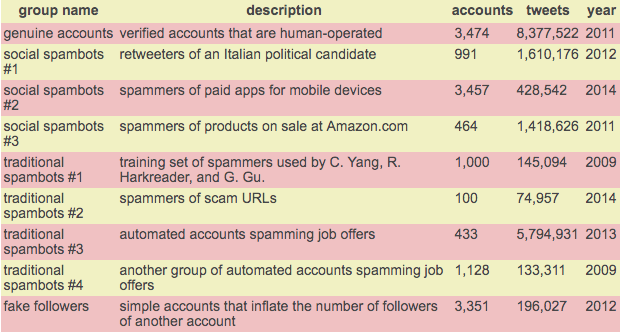

To make sure the number of genuine users and fake users is same, I choose the whole genunie users(3474). For the spam part, I choose:
social 1 top 500,
social 2 top 500,
social 3 top 464,
traditional 1 top 500,
tradition 2 overall 100,
tradtional 3 overall 403,
traditional 4 top 500,
fake followers top 507,
The total users of spam is 3474.

In [84]:
# import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)

# genuine_user count: 3474
genuine_user = pd.read_csv("data/genuine_accounts/users.csv")
# fake followers count: top 477
fake_user = pd.read_csv("data/fake_followers.csv/users.csv", nrows = 507)
# social 1 retweeters of Italian political candidate count: top 500
social_1 = pd.read_csv("data/social_spambots_1.csv/users.csv", nrows = 500)
# social 2 paid apps for mobile devices
social_2 = pd.read_csv("data/social_spambots_2.csv/users.csv", nrows = 500)
# social 3 products on sale at Amazon.com
social_3 = pd.read_csv("data/social_spambots_3.csv/users.csv")
# tradition 1 training set used by someone
tradition_1 = pd.read_csv("data/traditional_spambots_1.csv/users.csv", nrows = 500)
# tradition 2 scam URLS
tradition_2 = pd.read_csv("data/traditional_spambots_2.csv/users.csv")
# tradition 3 automated accounts spamming job offers
tradition_3 = pd.read_csv("data/traditional_spambots_3.csv/users.csv")
# tradition 4 another group of automated accounts spamming job offers
tradition_4 = pd.read_csv("data/traditional_spambots_4.csv/users.csv", nrows = 500)

list_ = []
list_.append(fake_user)
list_.append(social_1)
list_.append(social_2)
list_.append(social_3)
list_.append(tradition_1)
list_.append(tradition_2)
list_.append(tradition_3)
list_.append(tradition_4)

combined_fake = pd.concat(list_)

combined_fake.to_csv( "combined_fake.csv", index=False )
genuine_user.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,...,NaN,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0,0
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,...,NaN,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),NaN,NaN,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0,0
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,NaN,en,...,NaN,Let me see what your best move is!,NaN,NaN,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0,0
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,NaN,20. menna: #farida #nyc and the 80s actually y...,NaN,NaN,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0,0
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,NaN,en,...,NaN,Cosmetologist,NaN,NaN,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0,0


In [85]:
print(genuine_user.dtypes)

id                                      int64
name                                   object
screen_name                            object
statuses_count                          int64
followers_count                         int64
friends_count                           int64
favourites_count                        int64
listed_count                            int64
url                                    object
lang                                   object
time_zone                              object
location                               object
default_profile                       float64
default_profile_image                 float64
geo_enabled                           float64
profile_image_url                      object
profile_banner_url                     object
profile_use_background_image          float64
profile_background_image_url_https     object
profile_text_color                     object
profile_image_url_https                object
profile_sidebar_border_color      

In [106]:
genuine_user["id"] = genuine_user["id"].astype(str)
print(genuine_user.dtypes)

id                                     object
name                                   object
screen_name                            object
statuses_count                          int64
followers_count                         int64
friends_count                           int64
favourites_count                        int64
listed_count                            int64
url                                    object
lang                                   object
time_zone                              object
location                               object
default_profile                       float64
default_profile_image                 float64
geo_enabled                           float64
profile_image_url                      object
profile_banner_url                     object
profile_use_background_image          float64
profile_background_image_url_https     object
profile_text_color                     object
profile_image_url_https                object
profile_sidebar_border_color      

In [29]:
# fake user count: 3474
combined_fake.head()

contributors_enabled                     0
crawled_at                            2967
created_at                            3474
default_profile                        589
default_profile_image                   19
description                           2180
favourites_count                      3474
follow_request_sent                      0
followers_count                       3474
following                                0
friends_count                         3474
geo_enabled                            612
id                                    3474
is_translator                            0
lang                                  2974
listed_count                          3474
location                              1670
name                                  3474
notifications                            0
profile_background_color              2974
profile_background_image_url          3474
profile_background_image_url_https    2974
profile_background_tile               1052
profile_ban

In [30]:
genuine_user.count()

id                                    3474
name                                  3473
screen_name                           3474
statuses_count                        3474
followers_count                       3474
friends_count                         3474
favourites_count                      3474
listed_count                          3474
url                                   1266
lang                                  3474
time_zone                             2475
location                              2365
default_profile                       1032
default_profile_image                   13
geo_enabled                           2155
profile_image_url                     3474
profile_banner_url                    3165
profile_use_background_image          3084
profile_background_image_url_https    3474
profile_text_color                    3474
profile_image_url_https               3474
profile_sidebar_border_color          3474
profile_background_tile               1307
profile_sid

In [112]:
genuine_user['month'] = None
genuine_user['year'] = None
genuine_user['hour'] = None

index = 0
for item in genuine_user["created_at"]:
    meta = item.split(" ")
    month = meta[1]
    if month == 'Jan':
        month = int(1)
    elif month == 'Feb':
        month = int(2)
    elif month == 'Mar':
        month = int(3)
    elif month == 'Apr':
        month = int(4)
    elif month == 'May':
        month = int(5)
    elif month == 'Jun':
        month = int(6)
    elif month == 'Jul':
        month = int(7)
    elif month == 'Aug':
        month = int(8)
    elif month == 'Sep':
        month = int(9)
    elif month == 'Oct':
        month = int(10)
    elif month == 'Nov':
        month = int(11)
    elif month == 'Dec':
        month = int(12)
    hour = meta[3].split(":")[0]
    year = meta[5]
    genuine_user["month"][index] = month
    genuine_user["hour"][index] = int(hour)
    genuine_user["year"][index] = int(year)
    index += 1
genuine_user.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,month,year,hour
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,...,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0,0,6,2013,11
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,...,NaN,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0,0,5,2014,10
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,NaN,en,...,NaN,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0,0,5,2011,23
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,NaN,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0,0,9,2010,14
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,NaN,en,...,NaN,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0,0,2,2015,4


In [114]:
combined_fake['month'] = None
combined_fake['year'] = None
combined_fake['hour'] = None

index = 0
for item in combined_fake["created_at"]:
    meta = item.split(" ")
    if len(meta) == 6:
        month = meta[1]
        if month == 'Jan':
            month = int(1)
        elif month == 'Feb':
            month = int(2)
        elif month == 'Mar':
            month = int(3)
        elif month == 'Apr':
            month = int(4)
        elif month == 'May':
            month = int(5)
        elif month == 'Jun':
            month = int(6)
        elif month == 'Jul':
            month = int(7)
        elif month == 'Aug':
            month = int(8)
        elif month == 'Sep':
            month = int(9)
        elif month == 'Oct':
            month = int(10)
        elif month == 'Nov':
            month = int(11)
        elif month == 'Dec':
            month = int(12)
        hour = meta[3].split(":")[0]
        year = meta[5]
        combined_fake["month"][index] = month
        combined_fake["hour"][index] = int(hour)
        combined_fake["year"][index] = int(year)
    index += 1
combined_fake.head()

,contributors_enabled,crawled_at,created_at,default_profile,default_profile_image,description,favourites_count,follow_request_sent,followers_count,following,...,test_set_2,time_zone,timestamp,updated,url,utc_offset,verified,month,year,hour
0,NaN,NaN,Wed Oct 07 03:19:21 +0000 2009,NaN,NaN,real estate sales,1,NaN,19,NaN,...,NaN,Eastern Time (US & Canada),NaN,2013-06-12 18:38:35,http://www.jycondo.com,-18000.0,NaN,10,2009,3
1,NaN,NaN,Wed Oct 14 23:40:17 +0000 2009,NaN,NaN,NaN,138,NaN,208,NaN,...,NaN,Mexico City,NaN,2013-06-12 18:38:35,NaN,-21600.0,NaN,10,2009,23
2,NaN,NaN,Sun Jan 17 16:46:52 +0000 2010,NaN,NaN,le corna del capro scappato dal gregge s'infil...,8,NaN,59,NaN,...,NaN,London,NaN,2013-06-12 18:38:35,http://www.valcavargna.com/,0.0,NaN,1,2010,16
3,NaN,NaN,Mon Feb 15 15:49:58 +0000 2010,1.0,NaN,NaN,4,NaN,7,NaN,...,NaN,Lima,NaN,2013-06-12 18:38:35,NaN,-18000.0,NaN,2,2010,15
4,NaN,NaN,Mon Mar 15 11:38:55 +0000 2010,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",61,NaN,60,NaN,...,NaN,Riyadh,NaN,2013-06-11 17:39:44,http://www.facebook.com/Malek.AlBalawi,10800.0,NaN,3,2010,11


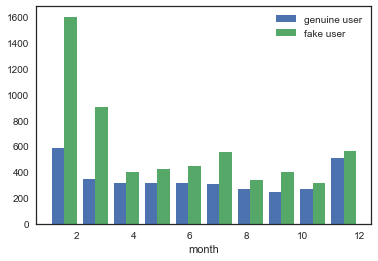

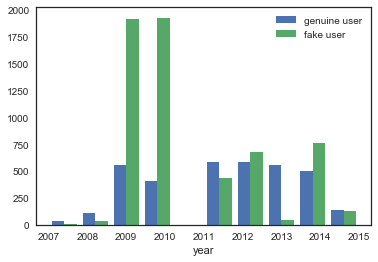

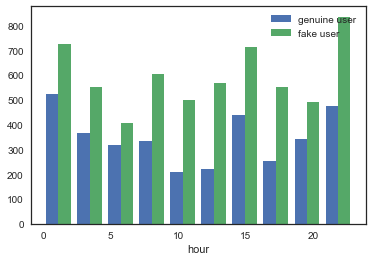

In [153]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist([genuine_user['month'], combined_fake['month']], label=['genuine user', 'fake user'])
plt.legend(loc='upper right')
plt.xlabel('month')
plt.show()

plt.hist([genuine_user['year'], combined_fake['year']], label=['genuine user', 'fake user'])
plt.legend(loc='upper right')
plt.xlabel('year')
plt.show()

plt.hist([genuine_user['hour'], combined_fake['hour']], label=['genuine user', 'fake user'])
plt.legend(loc='upper right')
plt.xlabel('hour')
plt.show()

In [161]:
ratio_genuine_user = float(genuine_user["default_profile"].count()) / genuine_user["id"].count()
ratio_fake_user = float(combined_fake["default_profile"].count()) / combined_fake["id"].count()

print("The proportion of users using default profile to total users: ")
print("genuine user:" + str(ratio_genuine_user))
print("fake user:" + str(ratio_fake_user))

ratio_genuine_user_image = float(genuine_user["default_profile_image"].count()) / genuine_user["id"].count()
ratio_fake_user_image = float(combined_fake["default_profile_image"].count()) / combined_fake["id"].count()

print 

print("The proportion of users using default profile image to total users: ")
print("genuine user:" + str(ratio_genuine_user_image))
print("fake user:" + str(ratio_fake_user_image))

The proportion of users using default profile to total users: 
genuine user:0.297063903282
fake user:0.169545192861

The proportion of users using default profile image to total users: 
genuine user:0.00374208405296
fake user:0.00546919976972


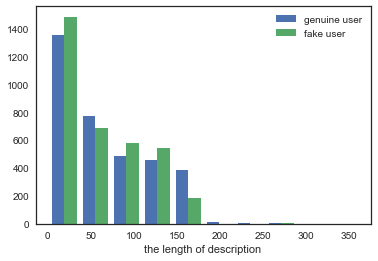

In [178]:
genuine_length_of_description = list()
fake_length_of_description = list()

genuine_user["description"] = genuine_user["description"].astype(str)
combined_fake["description"] = combined_fake["description"].astype(str)

for item in genuine_user["description"]:
    if item is not None:
        genuine_length_of_description.append(len(item))
    else:
        genuine_length_of_description.append(0)
        
for item in combined_fake["description"]:
    if item is not None:
        fake_length_of_description.append(len(item))
    else:
        fake_length_of_description.append(0)

plt.hist([genuine_length_of_description, fake_length_of_description], label=['genuine user', 'fake user'])
plt.legend(loc='upper right')
plt.xlabel('the length of description ')
plt.show()

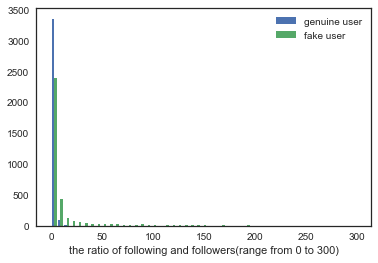

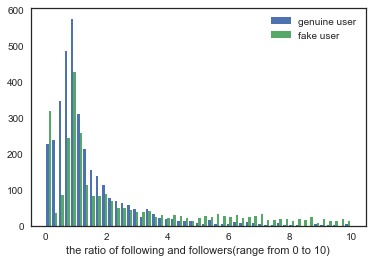

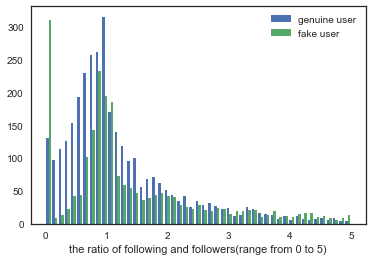

In [216]:
genuine_ratio_friends_followers = list()
fake_ratio_friends_followers = list()

for item in genuine_user[1:].iterrows():
    if item[1]["followers_count"] is not 0:
        genuine_ratio_friends_followers.append(float(item[1]["friends_count"]) / item[1]["followers_count"])
    else:
        genuine_ratio_friends_followers.append(0)
        
for item in combined_fake[1:].iterrows():
    if item[1]["followers_count"] is not 0:
        fake_ratio_friends_followers.append(float(item[1]["friends_count"]) / item[1]["followers_count"])
    else:
        fake_ratio_friends_followers.append(0)
bins = np.linspace(0, 300, 50)
plt.hist([genuine_ratio_friends_followers, fake_ratio_friends_followers], bins,label=['genuine user', 'fake user'])
plt.legend(loc='upper right')
plt.xlabel('the ratio of following and followers(range from 0 to 300)')
plt.show()

bins = np.linspace(0, 10, 50)
plt.hist([genuine_ratio_friends_followers, fake_ratio_friends_followers], bins,label=['genuine user', 'fake user'])
plt.legend(loc='upper right')
plt.xlabel('the ratio of following and followers(range from 0 to 10)')
plt.show()

bins = np.linspace(0, 5, 50)
plt.hist([genuine_ratio_friends_followers, fake_ratio_friends_followers], bins,label=['genuine user', 'fake user'])
plt.legend(loc='upper right')
plt.xlabel('the ratio of following and followers(range from 0 to 5)')
plt.show()

In [219]:
genuine_user["favourites_count"].describe()

count      3474.000000
mean       4669.620322
std       11527.566663
min           0.000000
25%         261.250000
50%        1286.000000
75%        4727.000000
max      313954.000000
Name: favourites_count, dtype: float64

In [220]:
combined_fake["favourites_count"].describe()

count     3474.000000
mean        26.658607
std        681.290298
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      34156.000000
Name: favourites_count, dtype: float64